# Titanic - Machine Learning from Disaster
https://www.kaggle.com/competitions/titanic/code?competitionId=3136

## data visualization

In [1]:
import pandas as pd
from pandas.core.frame import DataFrame
from pandas.core.series import Series
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
total_data= pd.concat([train_data, test_data], axis=0)
print("train data shape:", train_data.shape)
print("test data shape:", test_data.shape)
print("total data shape:", total_data.shape)

train data shape: (891, 12)
test data shape: (418, 11)
total data shape: (1309, 12)


In [3]:
def count_plot(label: str = None) -> None:
    if label is None:
        print(train_data['Survived'].value_counts())
        print(train_data['Survived'].mean())
    else:
        print(train_data.groupby(label)[['Survived']].value_counts())
        print(train_data.groupby(label)[['Survived']].mean())
    sns.countplot(x="Survived", data=train_data, hue=label)

Survived
0    549
1    342
Name: count, dtype: int64
0.3838383838383838


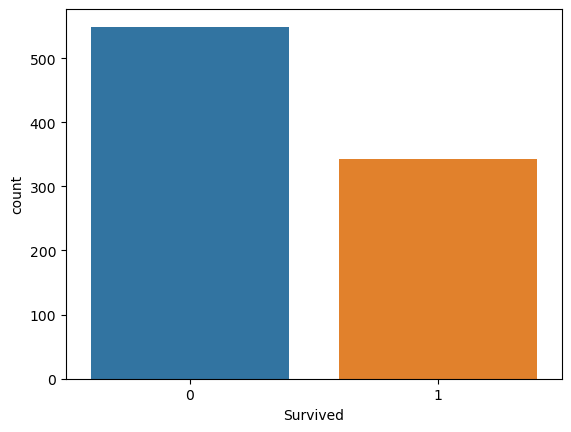

In [4]:
count_plot()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64
        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363


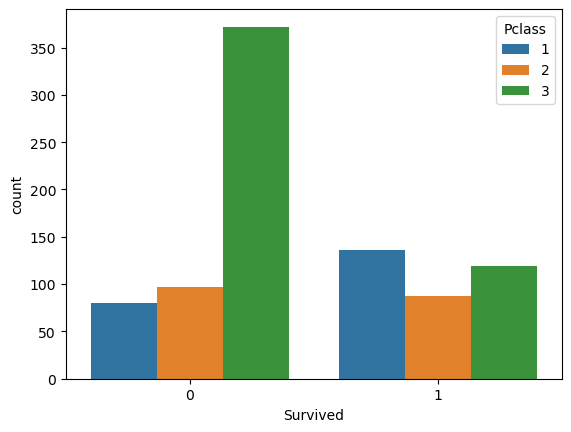

In [5]:
count_plot("Pclass")

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64
        Survived
Sex             
female  0.742038
male    0.188908


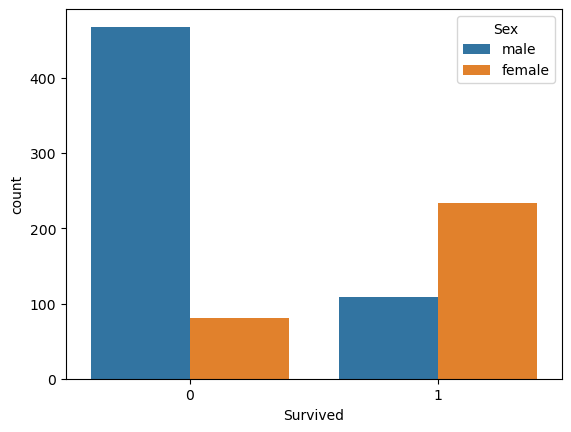

In [6]:
count_plot("Sex")

SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: count, dtype: int64
       Survived
SibSp          
0      0.345395
1      0.535885
2      0.464286
3      0.250000
4      0.166667
5      0.000000
8      0.000000


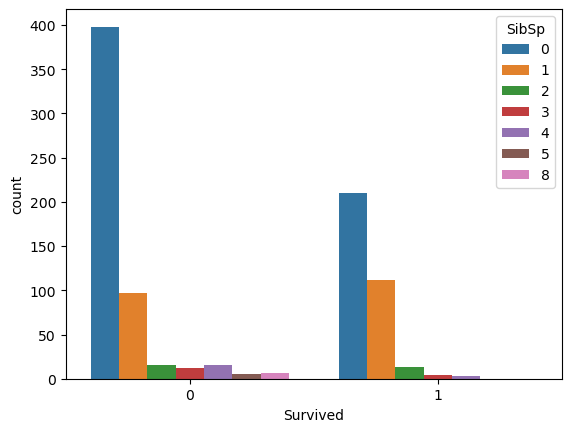

In [7]:
count_plot("SibSp")

Parch  Survived
0      0           445
       1           233
1      1            65
       0            53
2      0            40
       1            40
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: count, dtype: int64
       Survived
Parch          
0      0.343658
1      0.550847
2      0.500000
3      0.600000
4      0.000000
5      0.200000
6      0.000000


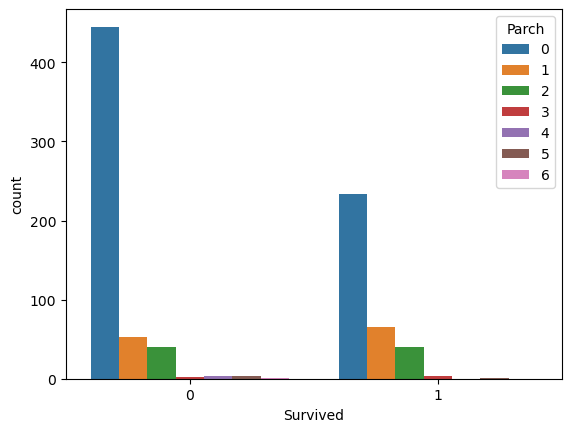

In [8]:
count_plot("Parch")

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: count, dtype: int64
          Survived
Embarked          
C         0.553571
Q         0.389610
S         0.336957


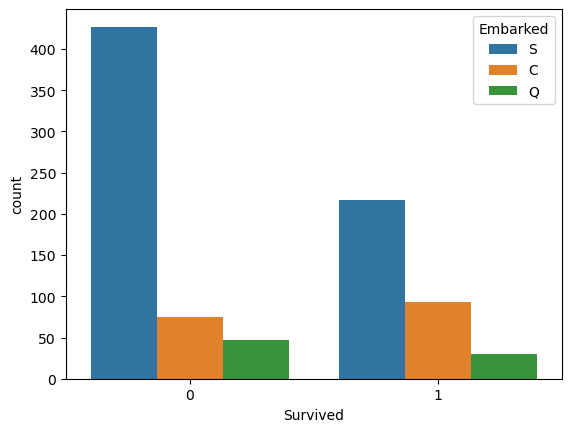

In [9]:
count_plot("Embarked")

## feature engineering

### data cleaning and encoding

In [10]:
def get_missing_count_and_persent(data: DataFrame) -> DataFrame:
    total_count = data.shape[0]
    
    def get_persent(x: int | float) -> float:
        return round(x / total_count * 100, 2)
    
    res = data.isnull().sum()
    res = res[res>0]
    res.sort_values(inplace=True)
    res: Series = pd.DataFrame({
        'ColumnName':res.index,
        'MissingCount':res.values,
    })
    res['Percent(%)'] = res["MissingCount"].apply(get_persent)
    return  res

print("train date:")
print(get_missing_count_and_persent(train_data))
print()
print("test data:")
print(get_missing_count_and_persent(test_data))

train date:
  ColumnName  MissingCount  Percent(%)
0   Embarked             2        0.22
1        Age           177       19.87
2      Cabin           687       77.10

test data:
  ColumnName  MissingCount  Percent(%)
0       Fare             1        0.24
1        Age            86       20.57
2      Cabin           327       78.23


In [11]:
print(total_data.dtypes)

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [12]:
print(train_data[pd.isnull(train_data["Age"])]["Survived"].value_counts())

Survived
0    125
1     52
Name: count, dtype: int64


['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer' 'Dona']
['Mr' 'Mrs' 'Miss' 'Master' 'Dr' 'Ms']
Mr 29.0
Mrs 35.5
Miss 22.0
Master 4.0
Dr 49.0
Ms 28.0
[False] [False]
Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')


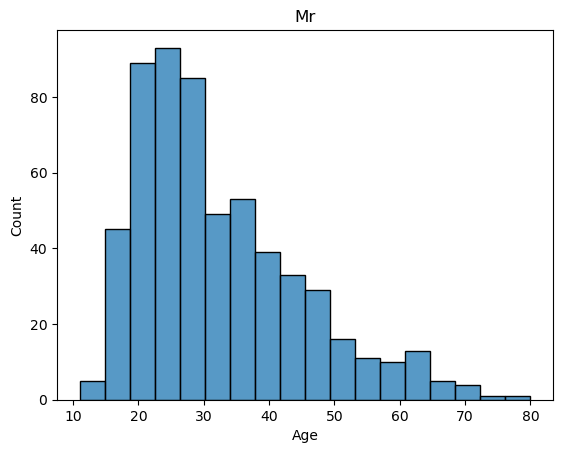

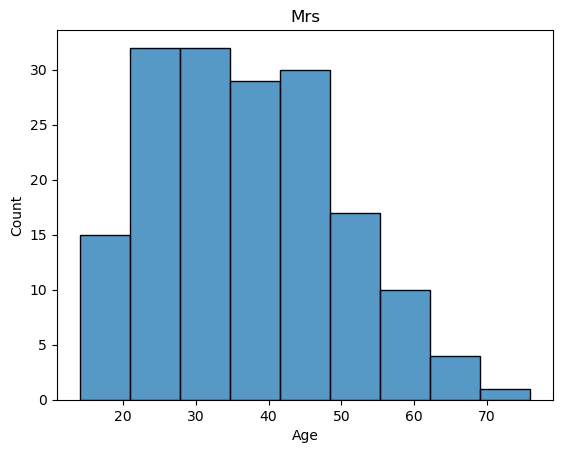

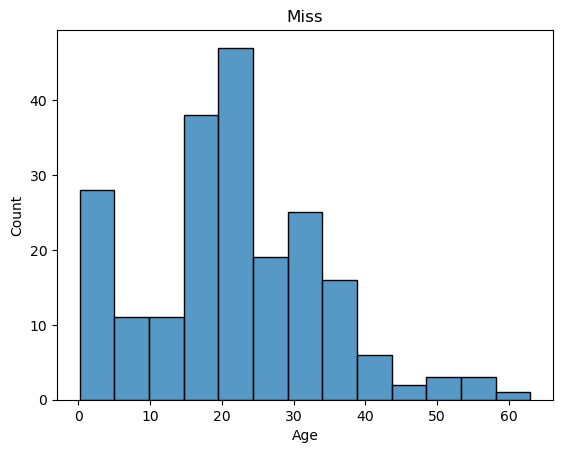

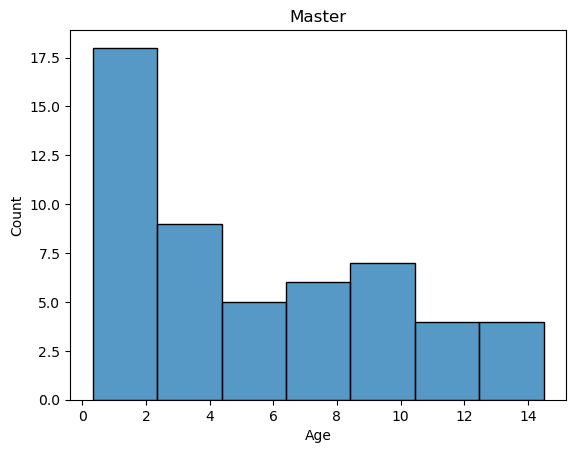

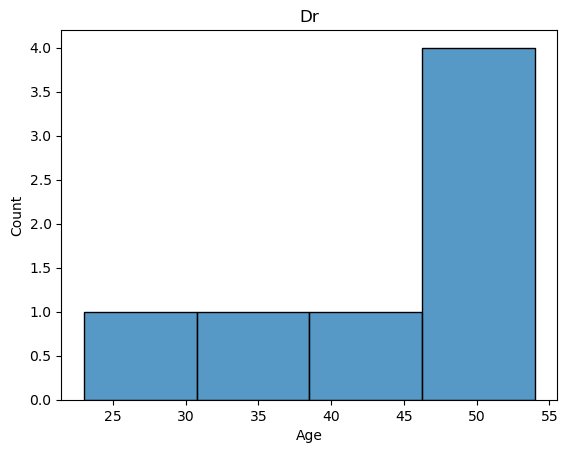

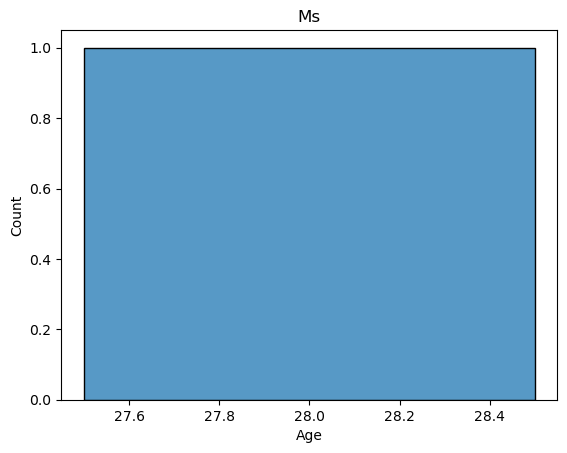

In [13]:
def get_persion_title_by_name(name: str) -> str:
    pos = name.find(", ") + 2
    name = name[pos:]
    pos = name.find(".")
    name = name[:pos]
    return name

def get_personal_title(data: DataFrame) -> Series:    
    return data["Name"].apply(get_persion_title_by_name)

def get_personal_title_and_age_data(data: DataFrame) -> DataFrame:
    res = DataFrame()
    res["Age"] = data["Age"]
    res["PersonalTitle"] = get_personal_title(data)
    return res

def fill_age_by_personal_title(
    train_data: DataFrame,
    test_data: DataFrame,
    total_data: DataFrame
) -> tuple[DataFrame, DataFrame]:
    has_age_data = total_data[total_data["Age"].notnull()]
    no_age_data = total_data[total_data["Age"].isnull()]
    has_age_with_personal_title = get_personal_title_and_age_data(has_age_data)
    no_age_with_personal_title = get_personal_title_and_age_data(no_age_data)
    print(has_age_with_personal_title["PersonalTitle"].unique())
    print(no_age_with_personal_title["PersonalTitle"].unique())
    
    def distplot_by_age(data: DataFrame, personal_title: str):
        personal_title_data = data[data["PersonalTitle"] == personal_title]
        plt.figure()
        sns.histplot(personal_title_data["Age"]).set(title=personal_title)  
    for title in no_age_with_personal_title["PersonalTitle"].unique():
        distplot_by_age(has_age_with_personal_title, title)
    
    train_data["PersonalTitle"] = get_personal_title(train_data)
    test_data["PersonalTitle"] = get_personal_title(test_data)
    
    for title in no_age_with_personal_title["PersonalTitle"].unique():
        median = has_age_with_personal_title[has_age_with_personal_title["PersonalTitle"] == title]["Age"].median()
        print(title, median)
        train_data.loc[(train_data["Age"].isnull())&(train_data["PersonalTitle"] == title), "Age"] = median
        test_data.loc[(test_data["Age"].isnull())&(test_data["PersonalTitle"] == title), "Age"] = median
    print(train_data["Age"].isnull().unique(), test_data["Age"].isnull().unique())
    train_data = train_data.drop(columns=["Name", "PersonalTitle"])
    test_data = test_data.drop(columns=["Name", "PersonalTitle"])
    print(train_data.columns)
    print(test_data.columns)
    return train_data, test_data
    
train_data, test_data = fill_age_by_personal_title(train_data, test_data, total_data)

In [14]:
def process_embarked(train_data: DataFrame, test_data: DataFrame) -> tuple[DataFrame, DataFrame]:
    embarked = train_data["Embarked"].value_counts()
    print(embarked)
    train_data["Embarked"] = train_data["Embarked"].fillna("S")
    mapping = {
        "S": embarked["S"],
        "C": embarked["C"],
        "Q": embarked["Q"],
    }
    train_data["Embarked"] = train_data["Embarked"].map(mapping)
    test_data["Embarked"] = train_data["Embarked"].map(mapping)
    return train_data, test_data

print(train_data["Embarked"].unique())
train_data, test_data = process_embarked(train_data, test_data)
print(train_data["Embarked"].unique())

['S' 'C' 'Q' nan]
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
[644 168  77]


[False]
[False]


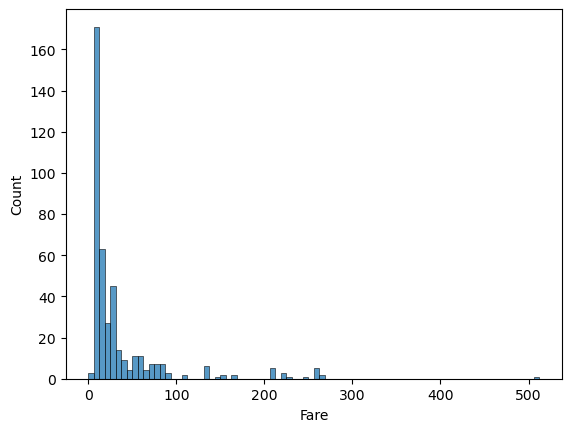

In [15]:
def process_fare(train_data: DataFrame) -> DataFrame:
    plt.figure()
    sns.histplot(test_data["Fare"])
    test_data["Fare"].fillna(test_data["Fare"].value_counts().idxmax())
    return train_data

print(train_data["Fare"].isnull().unique())
train_data = process_fare(train_data)
print(train_data["Fare"].isnull().unique())

In [16]:
def process_sex(train_data: DataFrame, test_data: DataFrame) -> tuple[DataFrame, DataFrame]:
    mapping = {"male": 1, "female": -1}
    train_data["Sex"] = train_data["Sex"].map(mapping)
    test_data["Sex"] = test_data["Sex"].map(mapping)
    return train_data, test_data
    
print(train_data["Sex"].unique(), test_data["Sex"].unique())
train_data, test_data = process_sex(train_data, test_data)
print(train_data["Sex"].unique(), test_data["Sex"].unique())

['male' 'female'] ['male' 'female']
[ 1 -1] [ 1 -1]


In [20]:
def process_cabin(train_data: DataFrame, test_data: DataFrame) -> tuple[DataFrame, DataFrame]:
    train_data = train_data.drop(columns=["Cabin"])
    test_data = test_data.drop(columns=["Cabin"])
    return train_data, test_data
train_data, test_data = process_cabin(train_data, test_data)

In [22]:
def process_ticket(train_data: DataFrame, test_data: DataFrame) -> tuple[DataFrame, DataFrame]:
    train_data = train_data.drop(columns=["Ticket"])
    test_data = test_data.drop(columns=["Ticket"])
    return train_data, test_data
train_data, test_data = process_ticket(train_data, test_data)

In [23]:
print(train_data.dtypes)
print()
print(test_data.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Sex            float64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int64
dtype: object

PassengerId      int64
Pclass           int64
Sex            float64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked       float64
dtype: object
